# Dealing with Skewed Data

In this notebook we'll explore the implications of skewed data and some solutions to reduce the skewedness of the data if necessary.

### Import Basic Packages

In [ ]:
#Basics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import Data & Describe Scenario

In this dataset we have many input varaibles that are being used to predict the **price** of a house.

In [ ]:
# Import data to a pandas dataframe
df_house = pd.read_csv('kc_house_data.csv')
df_house

### Understanding skew

In [ ]:
# Define the columns of interest for our transformation analysis
cols_of_interest = ['price','sqft_living','sqft_lot']

#cols_of_interest = df_house.select_dtypes('number').columns

In [ ]:
# Show a basic histplot of each column
for feature in cols_of_interest:
    sns.histplot(df_house[feature])
    plt.show()
    
#Press shift o to remove the scroll from the box.

In [ ]:
#Use the pandas skew function to calculate the skew of each numeric column
skewdata = df_house[cols_of_interest].skew()
skewdata

#### Interpretation of Skew Values
- Skew > 1 = high positive skew
- Skew > 0.5 = moderate positive skew

- Skew < -0.5 = moderate negative skew
- Skew < -1.0 = high negative skew

Other tests exist to **test for normality** of data, which include:
- Shapiro-Wilks test
- Kolmogorov–Smirnov test

### Solving Skew with Natural Logs

In [209]:
#Take the log of a single feature
df_house['log_price'] = np.log(df_house['price'])

for feature in cols_of_interest:
    df_house['log_' + feature] = np.log(df_house[feature])

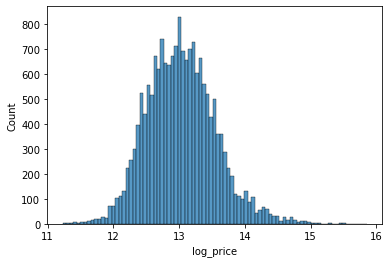

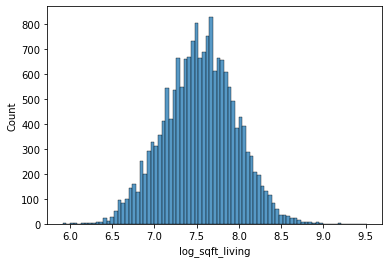

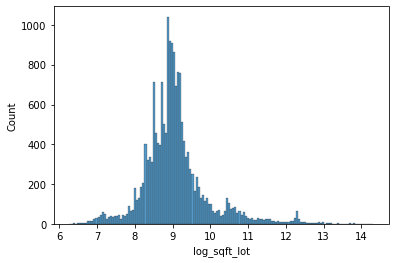

In [210]:
# Show a basic histplot of the price column (the target variable in this case)
for feature in cols_of_interest:
    sns.histplot(df_house['log_' + feature])
    plt.show()

#Press shift o to remove the scroll from the box.

In [211]:
log_cols = ['log_price','log_sqft_living','log_sqft_lot']

In [213]:
df_house[log_cols].skew()

log_price          0.413807
log_sqft_living   -0.035521
log_sqft_lot       1.230832
dtype: float64

### Alternatives to Natural Logs

In [ ]:
# log10 takes the log base 10 of each value. See also, log2, log1p
df_house['log10_price'] = np.log10(df_house['price'])
df_house

In [ ]:
# The square root transform can also be a helpful way to remove positive skew from a distribution
df_house['sqrt_price'] = np.sqrt(df_house['price'])
df_house

In [ ]:
# The cube root transform transforms the data even further
df_house['cbrt_price'] = np.cbrt(df_house['price'])
df_house

In [ ]:
# Alternatively, we can solve for left skew by raising all values of a feature to a power > 1.

#Note: In this case the price column is positively skewed, but code is provided as an example.
df_house['power2_price'] = np.power(df_house['price'],2)
df_house

**Further Reading**

If you wish to explore other methods, here are some recommendations:

- Box Cox Transformation - A semi automatic method for finding the optimal transformation for any POSITIVE feature.
- Power Transformer - SKLearn functionlity to implement boxcox and other transforms.

### Scenario 1 - Heteroskedastic Errors in A Linear Model

In [ ]:
# Scatterplots to visualise the correlations
ax = sns.scatterplot(data=df_house, x="sqft_living", y="price")
ax.set(title = 'sqft_living vs price')

Here we can see clearly that plotting a linear model between these two variables would result in a growing error term the sqft_living increases.

In [ ]:
df_house['log_price'] = np.log(df_house['price'])
df_house['log_sqft_living'] = np.log(df_house['sqft_living'])

In [ ]:
# Scatterplots to visualise the correlations
ax = sns.scatterplot(data=df_house, x="log_sqft_living", y="log_price")
ax.set(title = 'log_sft_living vs log_price')

Having performed a log-log transformation (log on dependent and independetn varaibles), we no longer have inconsistent errors.

### Scenario 2 - Fitting a Linear Model

In [ ]:
# Scatterplots to visualise the correlations
ax = sns.scatterplot(data=df_house, x="sqft_lot", y="price")
ax.set(title = 'sqft_lot vs price')

In this case, plotting a right skewed input against the right skewed target makes fitting a linear relationship particularly difficult.

In [ ]:
df_house['log_price'] = np.log(df_house['price'])
df_house['log_sqft_lot'] = np.log(df_house['sqft_lot'])

In [ ]:
# Scatterplots to visualise the correlations
ax = sns.scatterplot(data=df_house, x="log_sqft_lot", y="log_price")
ax.set(title = 'log_sqft_lot vs log_price')

Having taken the log of both input and target, we create a much more interpretable relationship.

### Exercise 1 (Basic) - Identifying Skewedness of Variable

Task:
- Import the phones dataset
- Plot the battery life percentage column
- identify the skewedness of the variable.

In [230]:
# Import the phone marketplace dataset. Phone price is the target variable.
df_phone = pd.read_csv('phone_marketplace_dataset.csv')
df_phone

,price,year_made,name,battery_life_percentage,storage,magnet_charging,marketplace,years_owned,visible_scratches,pro,original_sale_price,#_of_previous_owners,megapixel
0,551,2019,iPhone_11,74,64,no,kijiji,2,9,no,747,1,12
1,822,2020,iPhone_12,94,128,yes,craigslist,2,6,no,888,1,16
2,1008,2022,iPhone_13,97,256,yes,craigslist,0,2,no,1185,1,22
3,881,2021,iPhone_14,90,128,yes,craigslist,2,2,no,887,1,20
4,839,2020,iPhone_12,91,256,yes,kijiji,1,5,no,969,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,1326,2022,iPhone_14,91,64,yes,craigslist,0,0,no,1394,1,22
345,458,2019,iPhone_11,75,256,no,facebook,3,3,no,702,2,12
346,487,2019,iPhone_11,87,256,no,facebook,1,7,no,781,2,12
347,1340,2022,iPhone_14,100,256,yes,craigslist,0,0,no,1411,1,22


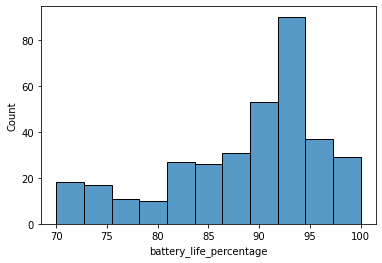

In [208]:
# Plot the battery life percentage feature
sns.histplot(df_phone['battery_life_percentage'])
plt.show()

In [215]:
# Calculate the skew value of the battery life percentage column
df_phone['battery_life_percentage'].skew()

# is battery life highly negatively skewed, moderately negative, not skewed, moderately positive, or highly positive?

-0.817025535352887

### Exercise 2 (Advanced) - Experiment with Transformations

Before you begin, think about which transformations are likely to help make this variable more normal.

Task:
- In a new column, calculate the natural log of the battery life column
- In a new column, calculate the log base 10 of the battery life column
- In a new column, calculate the square oot of the battery life column.
- In a new column, calculate the battery life column squared.
- In a new column, calculate the battery life column cubed.

- Plot the distributions on the same chart.
- Calcuate the skewedness of the new columns.
- Which one solved the skewedness most effectively?

In [239]:
# Create 4 new columns
df_phones['log_battery'] = np.log(df_phones['battery_life_percentage'])
df_phones['log10_battery'] = np.log10(df_phones['battery_life_percentage'])
df_phones['sqrt_battery'] = np.sqrt(df_phones['battery_life_percentage'])
df_phones['squared_battery'] = np.power(df_phones['battery_life_percentage'],2)
df_phones['cubed_battery'] = np.power(df_phones['battery_life_percentage'],3)
df_phones

,price,year_made,name,battery_life_percentage,storage,magnet_charging,marketplace,years_owned,visible_scratches,pro,...,log_battery_life_percentage,log_price,log10_battery_life_percentage,sqrt_battery_life_percentage,squared_battery_life_percentage,log_battery,log10_battery,sqrt_battery,squared_battery,cubed_battery
0,551,2019,iPhone_11,74,64,no,kijiji,2,9,no,...,4.304065,6.311735,1.869232,8.602325,5476,4.304065,1.869232,8.602325,5476,405224
1,822,2020,iPhone_12,94,128,yes,craigslist,2,6,no,...,4.543295,6.711740,1.973128,9.695360,8836,4.543295,1.973128,9.695360,8836,830584
2,1008,2022,iPhone_13,97,256,yes,craigslist,0,2,no,...,4.574711,6.915723,1.986772,9.848858,9409,4.574711,1.986772,9.848858,9409,912673
3,881,2021,iPhone_14,90,128,yes,craigslist,2,2,no,...,4.499810,6.781058,1.954243,9.486833,8100,4.499810,1.954243,9.486833,8100,729000
4,839,2020,iPhone_12,91,256,yes,kijiji,1,5,no,...,4.510860,6.732211,1.959041,9.539392,8281,4.510860,1.959041,9.539392,8281,753571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,1326,2022,iPhone_14,91,64,yes,craigslist,0,0,no,...,4.510860,7.189922,1.959041,9.539392,8281,4.510860,1.959041,9.539392,8281,753571
345,458,2019,iPhone_11,75,256,no,facebook,3,3,no,...,4.317488,6.126869,1.875061,8.660254,5625,4.317488,1.875061,8.660254,5625,421875
346,487,2019,iPhone_11,87,256,no,facebook,1,7,no,...,4.465908,6.188264,1.939519,9.327379,7569,4.465908,1.939519,9.327379,7569,658503
347,1340,2022,iPhone_14,100,256,yes,craigslist,0,0,no,...,4.605170,7.200425,2.000000,10.000000,10000,4.605170,2.000000,10.000000,10000,1000000


In [ ]:
# Create a list with the names of the 5 new columns
transform_cols = ['log_battery','log10_battery','sqrt_battery', 'squared_battery', 'cubed_battery']

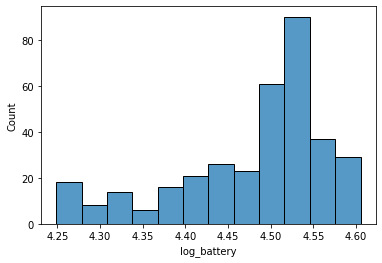

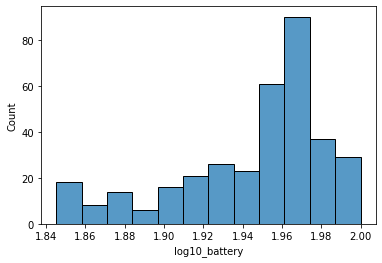

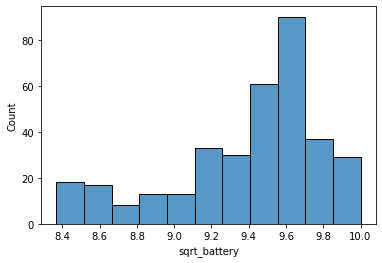

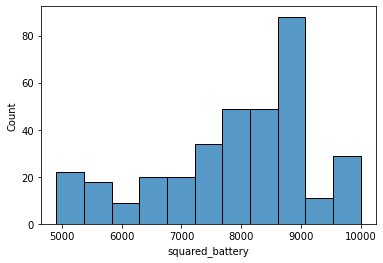

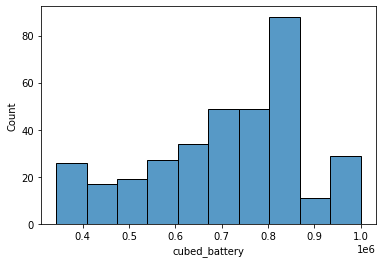

In [240]:
#Plot the 4 new columns together, and take a look at the new scales of each.

for feature in transform_cols:
    sns.histplot(df_phones[feature])
    plt.show()

In [247]:
# Calculate the skew of each of the new columns

for feature in transform_cols:
    print(feature + ": " + str(df_phones[feature].skew()))

log_battery: -0.9752812018882029
log10_battery: -0.9752812018882534
sqrt_battery: -0.896225285648387
squared_battery: -0.6584633854237617
cubed_battery: -0.5000973873265593


The original skew of the battery column was -0.8170. So infact only the squared and cubed columns made it better. In this case, using skew() as a basic measure of normality, we would continue with the cubed distribution.

### Further Practice

For further practice, try exercises 1 and 2 again, but using a positively skewed column.